<a href="https://colab.research.google.com/github/AdrianDVnqn/Proyecto-DS-CoderHouse---Predictor-Precio-Veh-culo-ML/blob/main/2daPreEntrega_Proyecto_Final_Predicci%C3%B3n_de_Precio_de_Venta_de_Automotores_DELLA_VALENTINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final - Predicción de Precio de Venta de Automotores**
## Coderhouse - Curso Data Science 46255
### Alumno: Adrian DELLA VALENTINA


**Desafío Entregable: Obtención de Insights**

6 de Diciembre de 2023

Para este desafío hice algunos gráficos (histogramas, boxplots, etc.) con el dataset tomado de MercadoLibre.

#Contexto







##**Un poco de la historia del automóvil**

- **Inicios (1880s):** Karl Benz patentó el primer automóvil impulsado por gas, "The Motorwagen".
- **Primer Vendedor Importante:** La empresa de Karl Benz se convirtió en el primer gran vendedor de automóviles.
- **Comienzo de la Industria (1903):** Francia lideró la producción mundial de automóviles, superando a Estados Unidos.
- **Impacto de la Segunda Guerra Mundial:** La producción automotriz se redujo drásticamente durante la guerra, seguida por el "Boom del Automóvil" después de la misma.
  
**Cambios Clave y Futuro de la Industria**

- **Regulación y Etiqueta Monroney (1958):** Se introdujo la Etiqueta Monroney, regulando la presentación de precios en vehículos.
- **Cambio en los 70s y 80s:** Crisis del petróleo llevó a la reducción de modelos y al auge del arrendamiento.
- **Impacto de la Tecnología (1990s):** La era de las computadoras y el surgimiento del comercio electrónico cambiaron el panorama automotriz.
- **Hacia el Futuro:** Digitalización, ventas en línea y vehículos eléctricos están dando forma al futuro de la industria automotriz.


##**Tendencias Actuales en Venta de Autos en Línea**

- **Crecimiento del E-Commerce Automotriz:** La pandemia impulsó la digitalización de los concesionarios de automóviles, aumentando la tendencia de la compra en línea.
  
- **Datos y Estadísticas Globales (2021):**
  - Valor del e-commerce automotriz mundial: 38.67 mil millones de dólares.
  - Pronóstico de crecimiento anual: 17.5%, alcanzando 176.24 mil millones de dólares en 2031.

- **Mercado de Vehículos Usados en Línea:**
  - Líderes: CarMax, Carvana y Auto1.
  - CarMax: Ingresos globales de más de 31.9 mil millones de dólares en el año fiscal que terminó el 28 de febrero de 2022.

- **Expansión en Dispositivos Móviles:**
  - Aplicaciones móviles: Importante contribución a las ventas digitales.
  - Encuesta 2022: Casi el 23% realizó compras automotrices en línea a través de sus teléfonos móviles.

- **Ventajas del Comercio Electrónico:**
  - Conveniencia: Percepción de una experiencia de compra flexible.
  - Facilidad de uso: Destacada en encuestas de seis países en octubre de 2021.

- **Confianza del Consumidor:**
  - Rápido crecimiento en ventas anuales en EE. UU. (más del 30% en febrero de 2022).
  - Desafío: La confianza en los mercados en línea sigue siendo baja en comparación con minoristas y fabricantes en línea establecidos.

# Problema Comercial

El problema comercial que enfrentamos es la falta de transparencia y objetividad en la determinación de los precios de los automóviles usados en el mercado. Actualmente, los precios se establecen de manera subjetiva y pueden variar considerablemente de un vendedor a otro, lo que dificulta a los compradores tomar decisiones informadas.

Además, el proceso de fijación de precios puede ser complicado y llevar mucho tiempo, lo que desalienta a los vendedores y compradores por igual. Esto da como resultado la ineficiencia del mercado y la pérdida de oportunidades comerciales.

Mediante la construcción de un modelo de ML que considere múltiples características de los automóviles y aprenda de un conjunto de datos extenso de ofertas de ventas previas, abordaremos este problema proporcionando estimaciones de precios objetivas y precisas. Nuestra solución permitirá a los usuarios obtener valoraciones de precios rápidas y confiables, por ej. sugiriendo un rango de precios recomendados al vendedor al momento de hacer la publicación de acuerdo las características del vehículo, mejorando así la eficiencia y la equidad en el mercado de compra y venta de automóviles usados online.

# Objetivo Principal

El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje automático (Machine Learning) que pueda predecir con precisión el precio de venta de automóviles en el mercado. A través de este modelo, se busca proporcionar a los compradores y vendedores de automóviles una herramienta confiable para estimar el valor de mercado de un vehículo en función de sus características clave.

# Preguntas Claves

¿Cuáles son los factores más influyentes en la determinación del precio de venta de un automóvil usado?

¿Cómo se pueden utilizar modelos de Machine Learning para predecir con precisión el precio de un automóvil en función de sus características, como marca, modelo, año de producción y kilometraje?

¿Cómo puede esta predicción de precios beneficiar a los vendedores y compradores de automóviles al proporcionar una guía más precisa para establecer y evaluar los precios de venta en el mercado de automóviles?


Nota: de aquí en adelante, la entrega debe complementarse con la primera preentrega del proyecto, donde se realizó la EDA, desarrollo del modelo de regresión lineal, etc.

In [ ]:
import requests
import pandas as pd
import json
import datetime

Para este desafío decidí conectarme a la API de MercadoLibre, con el objetivo de extraer datos de publicaciones de vehículos.

Creé una cuenta de developer para obtener las credenciales de acceso (client_id, client_secret).

Inspeccionando la página encontré que la categoría de autos y camionetas es la "MLA1744".

In [ ]:
# Define las credenciales
client_id = '5330099704345800'
client_secret = 'TiTId8i4r5gHGXkwTQM0TVmwnd3Td8kQ'

# Obtiene un token de acceso
auth_url = 'https://api.mercadolibre.com/oauth/token'
auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret
}
auth_response = requests.post(auth_url, data=auth_data)
auth_token = auth_response.json()['access_token']

# Realiza una solicitud a la API de búsqueda de MercadoLibre para la categoría MLA1744
search_url = 'https://api.mercadolibre.com/sites/MLA/search?category=MLA1744'

params = {
    'offset': 0, #desde qué resultado queremos.
    'limit': 50,  # Puedes ajustar la cantidad de resultados que deseas obtener. El máximo valor que me funcionó fue 50.

}

headers = {
    'Authorization': f'Bearer {auth_token}'
}

df= requests.get(search_url)
print(df)

response = requests.get(search_url, params=params, headers=headers)

fecha_actual = datetime.datetime.now().strftime('%d-%b-%y')

# Crea el nombre del archivo con la fecha actual
nombre_archivo = f"resultados_mercadolibre_{fecha_actual}.json"
if response.status_code == 200:
    # Parsea la respuesta JSON
    data = response.json()

    # Guarda el JSON en un archivo
    with open(nombre_archivo, 'w', encoding='utf-8') as json_file:
        json.dump(data, json_file, ensure_ascii=False, indent=4)

<Response [200]>


Analizando el JSON pude encontrar los atributos que me pueden resultar de interés para el proyecto.
Estas son:

"id",

"title",

"currency_id",

"price",

"ITEM_CONDITION",

"TRACTION_CONTROL",

"ENGINE_DISPLACEMENT",

"LENGTH",

"PASSENGER_CAPACITY",

"POWER", "BRAND",

"DOORS",

"ENGINE",

"FUEL_TYPE",

"KILOMETERS",

"MODEL",

"TRANSMISSION",

"TRIM",

"VEHICLE_YEAR".

In [ ]:
# Carga los datos desde el archivo JSON
with open('resultados_mercadolibre.json', 'r', encoding='utf-8') as json_file:
    jsondata = json.load(json_file)

# Extrae datos de "results"
results_data = []
for result in jsondata['results']:
    result_dict = {
        'id': result['id'],
        'title': result['title'],
        'currency_id': result['currency_id'],
        'price': result['price']
    }
    results_data.append(result_dict)

# Extrae datos de "attributes"
attributes_data = []
for result in jsondata['results']:
    attributes_dict = {attribute['id']: attribute['value_name'] for attribute in result['attributes'] if attribute['id'] in ["ITEM_CONDITION","TRACTION_CONTROL","ENGINE_DISPLACEMENT", "LENGTH", "PASSENGER_CAPACITY", "POWER", "BRAND", "DOORS", "ENGINE", "FUEL_TYPE", "KILOMETERS", "MODEL", "TRANSMISSION", "TRIM", "VEHICLE_YEAR"]}
    attributes_data.append(attributes_dict)

# Crea un DataFrame a partir de los datos de "results"
df_results = pd.DataFrame(results_data)

# Crea un DataFrame a partir de los datos de "attributes"
df_attributes = pd.DataFrame(attributes_data)

# Combina los DataFrames
df_combined = pd.concat([df_results, df_attributes], axis=1)

# Guardar el DataFrame en un archivo XLS
df_combined.to_excel('datos_full.xlsx', index=False)


In [ ]:
print(df_combined)

               id                                              title  \
0   MLA1548588674          Peugeot 208 Allure 1.6 Mt Touchscreen  Jc   
1   MLA1548582864       Peugeot 5008 Gt Pack Nueva Linea 2024 0km Ys   
2   MLA1548402254  Peugeot 3008 Gt Pack Thp Tiptronic Nueva Linea...   
3   MLA1548415308                   Jeep Compass Limited Plus At9 As   
4   MLA1548582638        Peugeot 208 Feline At 2024 0km Patentado Az   
5   MLA1548519248           Peugeot 208 Feline Tiptronic Am24 0km Az   
6   MLA1548582546        Peugeot 208 Allure Pk Tiptronic Am24 0km Az   
7   MLA1548415136                           Peugoet 3008 Gt Pack  As   
8   MLA1548415068                                    Peugeot 5008 As   
9   MLA1548466868        Peugeot 208 Allure Pack 2024 0km Contado Az   
10  MLA1548582354                Peugeot 208 Allure Pack 2024 0km Az   
11  MLA1548479878                     Peugeot 3008 Gt Pack Am23.5 Jc   
12  MLA1548414912               Peugeot 208 Active Pack Tiptroni

A continuación, extendí el código para extraer la máxima cantidad de resultados que permite la API de MercadoLibre, que es 4000.

In [ ]:
# Define las credenciales
client_id = '5330099704345800'
client_secret = 'TiTId8i4r5gHGXkwTQM0TVmwnd3Td8kQ'

# Obtiene un token de acceso
auth_url = 'https://api.mercadolibre.com/oauth/token'
auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret
}
auth_response = requests.post(auth_url, data=auth_data)
auth_token = auth_response.json()['access_token']

# Realiza una solicitud a la API de búsqueda de MercadoLibre para la categoría MLA1744

search_url = 'https://api.mercadolibre.com/sites/MLA/search?category=MLA1744'

# Establece los parámetros iniciales
params = {
    'limit': 50,
    'offset': 0  # Empieza desde offset 0
}

headers = {
    'Authorization': f'Bearer {auth_token}'
}

# Inicializa los DataFrames
results_data = []
attributes_data = []

while params['offset'] < 4000:  # Realiza la solicitud hasta que offset alcance 4000, que es el máximo que permite la API (da error con valores >4000)
    response = requests.get(search_url, params=params, headers=headers)

    if response.status_code == 200:
        # Parsea la respuesta JSON
        response_data = response.json()

        if 'results' in response_data:
            for result in response_data['results']:

              # Extrae el valor de "car_dealer" de "seller" si está presente, para saber si es una concesionaria (true) o vendedor particular (false)
                car_dealer = result.get('seller', {}).get('car_dealer', None)

                result_dict = {
                    'id': result['id'],
                    'title': result['title'],
                    'currency_id': result['currency_id'],
                    'price': result['price'],
                    'car_dealer': car_dealer
                }
                results_data.append(result_dict)

                attributes_dict = {attribute['id']: attribute['value_name'] for attribute in result['attributes'] if attribute['id'] in ["ITEM_CONDITION","TRACTION_CONTROL","ENGINE_DISPLACEMENT", "LENGTH", "PASSENGER_CAPACITY", "POWER", "BRAND", "DOORS", "ENGINE", "FUEL_TYPE", "KILOMETERS", "MODEL", "TRANSMISSION", "TRIM", "VEHICLE_YEAR"]}
                attributes_data.append(attributes_dict)

        # Incrementa el offset en 50 para la siguiente solicitud
        params['offset'] += 50
    else:
        print(f"Error en la solicitud con offset {params['offset']}")

# Crea DataFrames a partir de los datos
df_results = pd.DataFrame(results_data)
df_attributes = pd.DataFrame(attributes_data)

# Combina los DataFrames
df_combined = pd.concat([df_results, df_attributes], axis=1)

nombre_dataframe = f"resultados_ML_Autos_full_{fecha_actual}.xlsx"

# Guardar el DataFrame en un archivo XLS porque me resulta más fácil de ver los resultados, pero puede ser en cualquier otro formato de tabla.
df_combined.to_excel(nombre_dataframe, index=False)


# Data Wrangling

Continuando con esto, para cumplir con el desafío de Data Wrangling, encontré que el json de respuesta a la API anterior no incluye la descripción de cada publicación. Para conseguirla, se debe llamar a otra API, api.mercadolibre.com/items/. Esta devuelve un json que contiene la descripción.

Por lo tanto, genero el código que toma el dataset generado antes, y agrega una columna nueva llamada 'descripción'.

In [ ]:
# Lee el archivo .xlsx
df = pd.read_excel('resultados_ML_Autos_full_08-Nov-23.xlsx')

api_url = 'https://api.mercadolibre.com/items/'

# Función para obtener la descripción de un item
def get_item_description(item_id):
    response = requests.get(f'{api_url}{item_id}/description', headers={'Authorization': f'Bearer {auth_token}'})
    if response.status_code == 200:
        description_data = response.json()
        return description_data.get('plain_text', '')
    return ''

# Itera sobre las filas y obtén las descripciones
descripciones = []
for index, row in df.iterrows():
    item_id = row['id']
    descripcion = get_item_description(item_id)
    descripciones.append(descripcion)

# Agrega las descripciones al DataFrame
df['descripción'] = descripciones

# Genera el nombre del archivo con la fecha actual

nombre_archivo = f'resultados_ML_Autos_conDescrip_full_{fecha_actual}.xlsx'

# Guarda el nuevo DataFrame en un archivo .xlsx
df.to_excel(nombre_archivo, index=False)

print(f'Archivo guardado como {nombre_archivo}')


Archivo guardado como resultados_ML_Autos_conDescrip_full_08-Nov-23.xlsx


Ahora que tengo el dataset con la descripción de cada publicación, quiero detectar palabras clave para generar más atributos. Por ejemplo, se busca si la descripción contiene "gnc", para generar un atributo que nos diga si el auto tiene equipo de GNC.

In [ ]:
import pandas as pd
import re
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Coderhouse - Curso Data Science'

# Define la función para buscar "gnc" en el texto
def tiene_gnc(texto):
    if isinstance(texto, str):
        # Excluye las descripciones con "posibilidad gnc" o "opcional gnc"
        if re.search(r'(posibilidad|opcional) gnc', texto, flags=re.I):
            return False
        # Busca "gnc" en otras descripciones
        return bool(re.search(r'gnc', texto, flags=re.I))
    else:
        return False

# Carga el dataset
df = pd.read_excel('resultados_ML_Autos_conDescrip_full_08-Nov-23.xlsx')

# Crea una nueva columna "GNC" utilizando la función personalizada
df['GNC'] = df['descripción'].apply(tiene_gnc)

# Guarda el DataFrame actualizado
df.to_excel('resultados_ML_Autos_conGNC_08-Nov-23.xlsx', index=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse - Curso Data Science


Entonces, mediante la función `re.search`, se identificaron aquellas publicaciones cuyas descripciones contienen la palabra 'gnc' (excluyendo "posibilidad gnc" y "opcional gnc"), y se creó una nueva columna con valores booleanos.

De realizar un análisis más exhaustivo de las descripciones, es posible descubrir otras palabras clave de interés o información que podría resultar útil para entrenar el modelo predictivo.

#Obtención de Insights

Se realiza el Análisis Uni y Bivariado del dataset para intentar encontrar insights que permitan responder las preguntas claves anteriormente desarrolladas.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Coderhouse - Curso Data Science'
# Carga el dataset
df = pd.read_excel('resultados_ML_Autos_conGNC_08-Nov-23.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coderhouse - Curso Data Science


In [ ]:
df.head()

,id,title,currency_id,price,car_dealer,ITEM_CONDITION,TRACTION_CONTROL,ENGINE_DISPLACEMENT,LENGTH,PASSENGER_CAPACITY,...,DOORS,ENGINE,FUEL_TYPE,KILOMETERS,MODEL,TRANSMISSION,TRIM,VEHICLE_YEAR,descripción,GNC
0,MLA1394616829,Peugeot Partner Confort Nafta Oportunidad Fina...,ARS,12410960,True,Nuevo,Delantera,1.6 L,4137 mm,2.0,...,3,1.6,Nafta,0 km,Partner,Manual,1.6 Furgon Confort,2023,**ESTE PRECIO CORRESPONDE AL PATENTAMIENTO ENE...,False
1,MLA1394714011,Peugeot 208 Allure Am24,ARS,12318340,True,Nuevo,Delantera,1.6 L,4075 mm,5.0,...,5,1.6,Nafta,0 km,208,Manual,1.6l Allure Pack,2023,**ESTE PRECIO CORRESPONDE AL PATENTAMIENTO ENE...,False
2,MLA1394677957,Peugeot 208 Feline Tiptronic Am24 Oportunidad,ARS,15650000,True,Nuevo,Delantera,1.6 L,4075 mm,5.0,...,5,1.6,Nafta,0 km,208,Automática,1.6l Feline Tiptronic am23.5,2023,**EL PRECIO PUBLICADO CORRESPONDE A UN TÍTULO ...,False
3,MLA1394629253,Peugeot 208 Active Pack Manual Oportunidad,ARS,11510600,True,Nuevo,Delantera,1.6 L,4075 mm,5.0,...,5,1.6,Nafta,0 km,208,Manual,1.6l Active Pack,2023,**ESTE PRECIO CORRESPONDE AL PATENTAMIENTO ENE...,False
4,MLA1394665333,Peugeot 208 Active Pack Tiptronic Oportunidad,ARS,9727982,True,Nuevo,Delantera,1.6 L,4075 mm,5.0,...,5,1.6,Nafta,0 km,208,Automática,1.6l Active Pack Tiptronic,2023,**EL PRECIO CORRESPONDE A FACTURACIÓN DIRECTA ...,False


Se observa que hay algunas variables numéricas que están en formato string y deben limpiarse antes de poder graficarlas.

In [ ]:
# Lista de columnas a limpiar
columnas_a_limpiar = ['ENGINE_DISPLACEMENT', 'LENGTH', 'POWER', 'KILOMETERS']

# Limpiar las columnas y extraer solo los valores numéricos
for columna in columnas_a_limpiar:
    df[columna] = df[columna].str.extract('(\d+)').astype(float)
# Mostrar el DataFrame después de la limpieza
print("\nDataFrame después de la limpieza:")
print(df)


DataFrame después de la limpieza:
                 id                                              title  \
0     MLA1394616829  Peugeot Partner Confort Nafta Oportunidad Fina...   
1     MLA1394714011                            Peugeot 208 Allure Am24   
2     MLA1394677957      Peugeot 208 Feline Tiptronic Am24 Oportunidad   
3     MLA1394629253         Peugeot 208 Active Pack Manual Oportunidad   
4     MLA1394665333      Peugeot 208 Active Pack Tiptronic Oportunidad   
...             ...                                                ...   
3992  MLA1553956516  Toyota Yaris Automatico Cuero 0km 2023 Xls Pac...   
3993  MLA1467797198              Peugeot 308 2013 1.6 Cc Thp 156cv Nav   
3994  MLA1540977082  Peugeot Partner Nueva Confort Nafta 1.6 Okm Me...   
3995  MLA1428405960  Chevrolet Cruze 4 Puertas Lt 1.4 Turbo Automát...   
3996  MLA1552522284                   Audi Ambition Tfsi 2.0 T 211 Cv    

     currency_id     price  car_dealer ITEM_CONDITION TRACTION_CONTROL  \
0 

## Análisis Univariado

En el proceso de exploración del conjunto de datos, se lleva a cabo un análisis univariado exhaustivo para comprender mejor la distribución y características individuales de las variables clave.

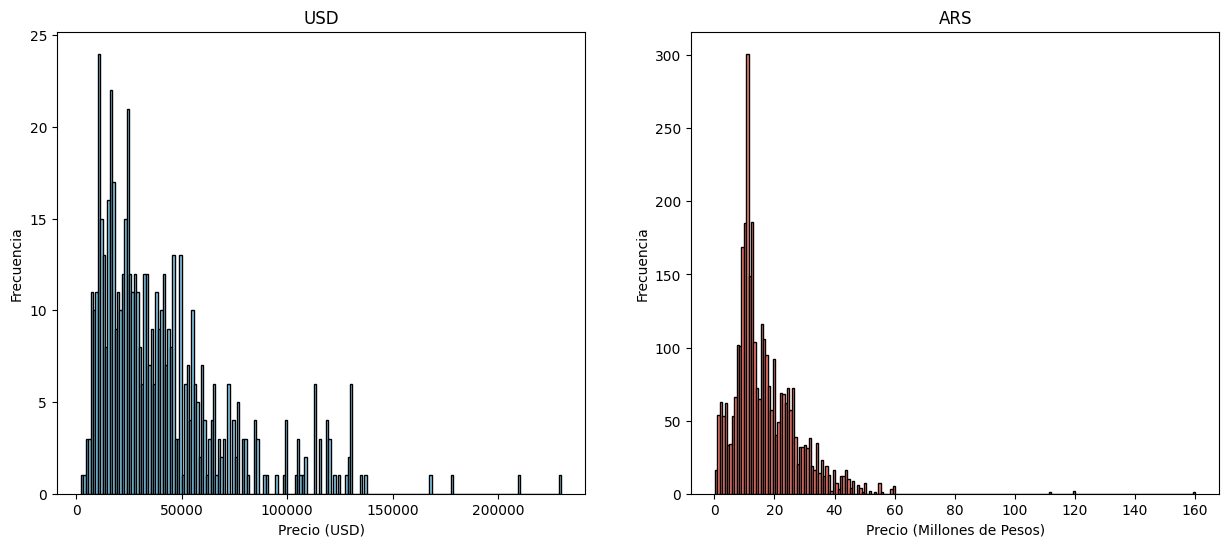

In [ ]:
# Filtrar el DataFrame para 'currency_id' igual a 'USD' y 'ARS'
df_usd = df[df['currency_id'] == 'USD']
df_ars = df[df['currency_id'] == 'ARS']

# Configurar el tamaño de los gráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Crear histograma para 'price' con 'currency_id' igual a 'USD'
axs[0].hist(df_usd['price'], bins=200, color='skyblue', edgecolor='black')
axs[0].set_title('USD')
axs[0].set_xlabel('Precio (USD)')
axs[0].set_ylabel('Frecuencia')

# Crear histograma para 'price' con 'currency_id' igual a 'ARS'
axs[1].hist(df_ars['price'] / 1e6, bins=200, color='salmon', edgecolor='black')
axs[1].set_title('ARS')
axs[1].set_xlabel('Precio (Millones de Pesos)')
axs[1].set_ylabel('Frecuencia')

# Mostrar los gráficos
plt.show()

Antes de continuar con el EDA, se convierten los valores expresados en pesos a dólares según la cotización del dolar blue de hoy (6 de Diciembre de 2023) que es 950 pesos aprox.

Esto es para tener el precio expresado en una única moneda y poder visualizar correctamente la distribución de las variables según el precio.

In [ ]:
# Crear una copia del DataFrame original
df2 = df.copy()

# Aplicar la transformación para filas con 'currency_id' igual a 'ARS' en df2
df2.loc[df2['currency_id'] == 'ARS', 'price'] = df2.loc[df2['currency_id'] == 'ARS', 'price'] / 950
df2 = df2.drop('currency_id', axis=1)


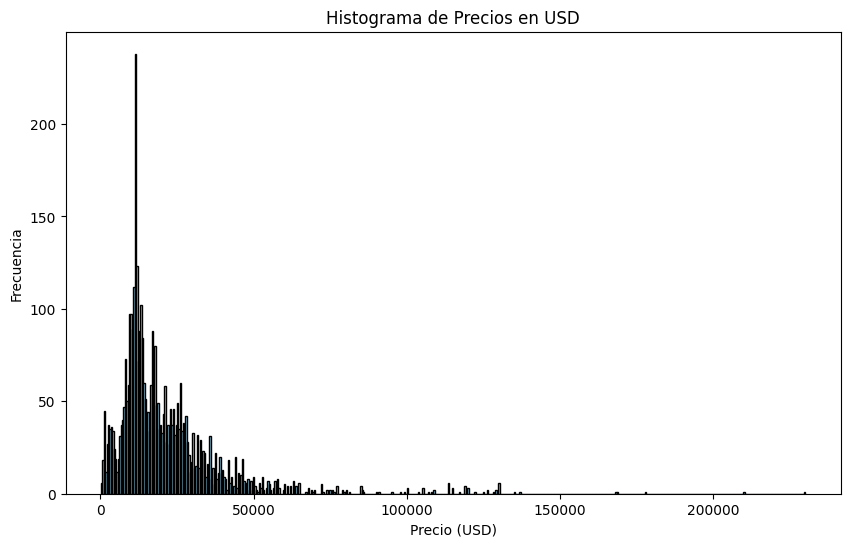

In [ ]:
# Crear histograma para 'price' ahora con todos los valores en USD.
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear histograma para 'price' en df2
plt.hist(df2['price'], bins=500, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios en USD')

# Mostrar el histograma
plt.show()

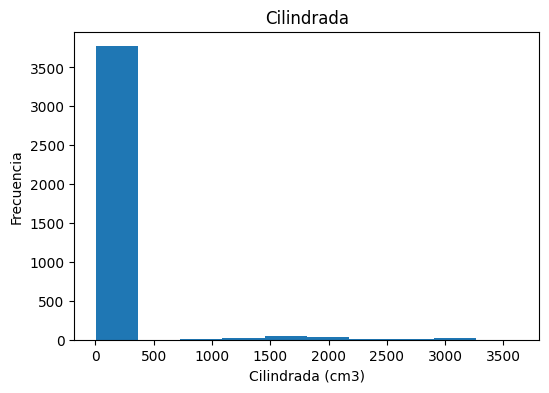

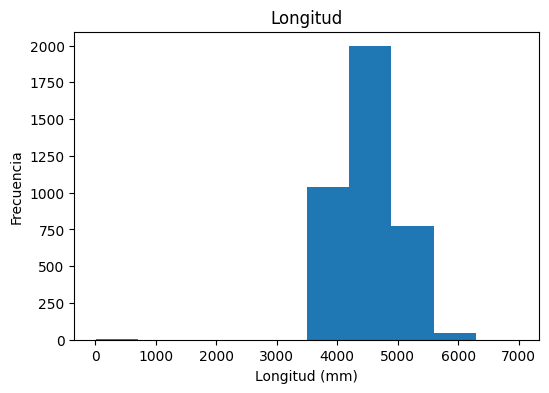

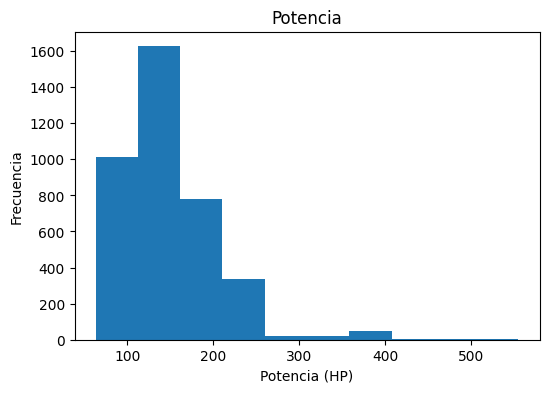

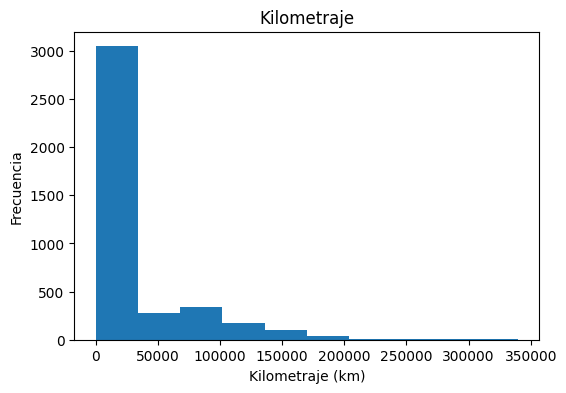

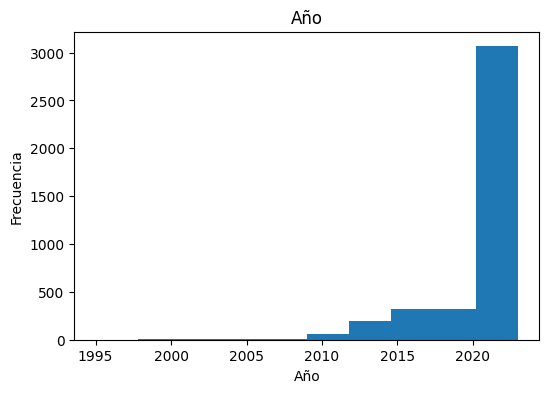

In [ ]:
import matplotlib.pyplot as plt

# Histograma de Cilindrada
plt.figure(figsize=(6, 4))
plt.hist(df['ENGINE_DISPLACEMENT'], bins=10)
plt.title('Cilindrada')
plt.xlabel('Cilindrada (cm3)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Longitud
plt.figure(figsize=(6, 4))
plt.hist(df['LENGTH'], bins=10)
plt.title('Longitud')
plt.xlabel('Longitud (mm)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Potencia
plt.figure(figsize=(6, 4))
plt.hist(df['POWER'], bins=10)
plt.title('Potencia')
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Kilometraje
plt.figure(figsize=(6, 4))
plt.hist(df['KILOMETERS'], bins=10)
plt.title('Kilometraje')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Frecuencia')
plt.show()

# Histograma de Año
plt.figure(figsize=(6, 4))
plt.hist(df['VEHICLE_YEAR'], bins=10)
plt.title('Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


Se observa en la cilindrada que hay valores mezclados expresados en litros, que usualmente son valores menores a 10, y valores en cm3, o sea 1.000 veces mayores. Entonces, se transforma a litros aquellos valores superiores a 50, dividiéndolos por 1000:

In [ ]:
import pandas as pd

# Condicional: Si el valor en 'ENGINE_DISPLACEMENT' es mayor a 50, dividir por 1000
df2.loc[df2['ENGINE_DISPLACEMENT'] > 50, 'ENGINE_DISPLACEMENT'] /= 1000


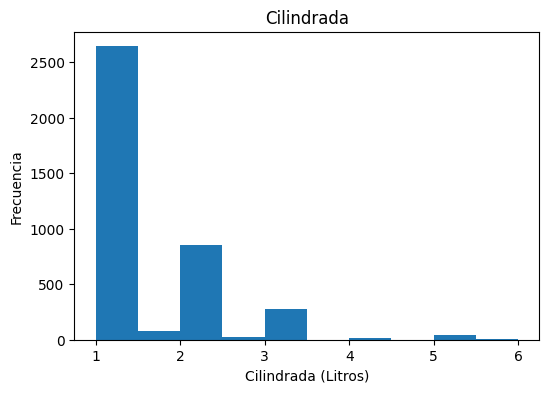

In [ ]:
# Histograma de Cilindrada
plt.figure(figsize=(6, 4))
plt.hist(df2['ENGINE_DISPLACEMENT'], bins=10)
plt.title('Cilindrada')
plt.xlabel('Cilindrada (Litros)')
plt.ylabel('Frecuencia')
plt.show()

<Figure size 1200x1000 with 0 Axes>

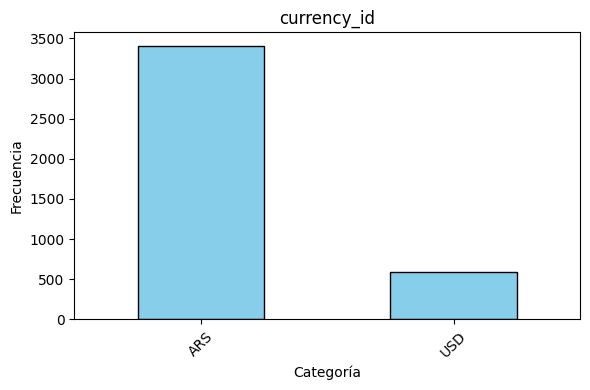

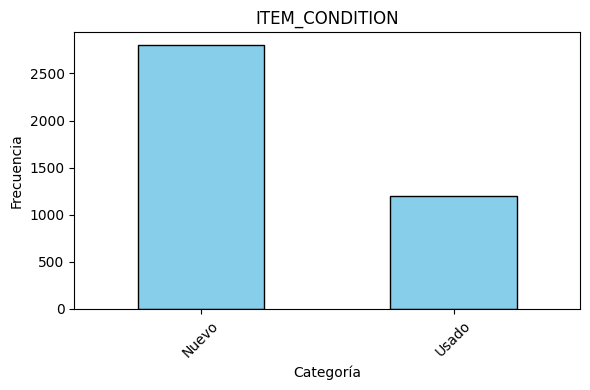

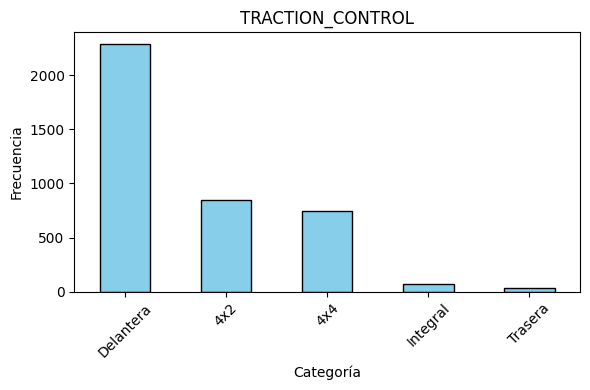

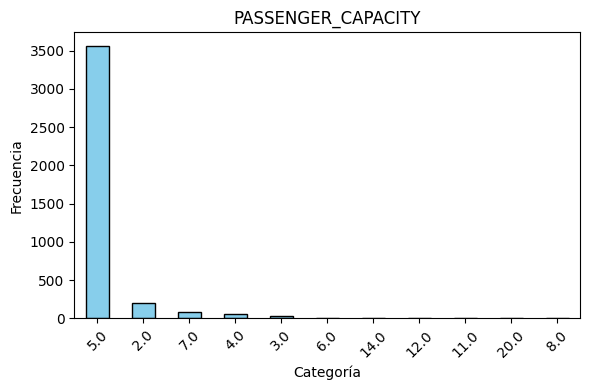

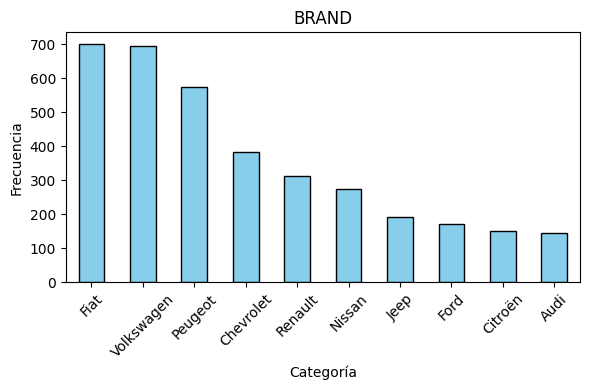

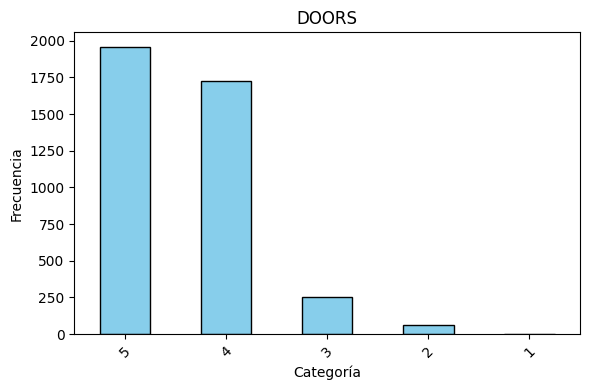

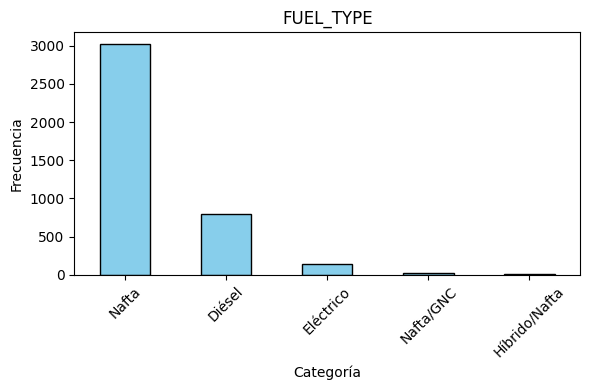

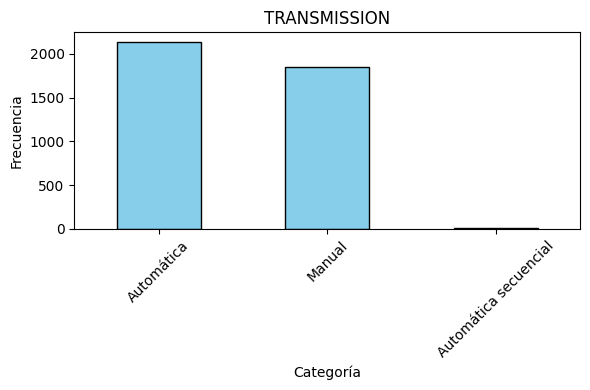

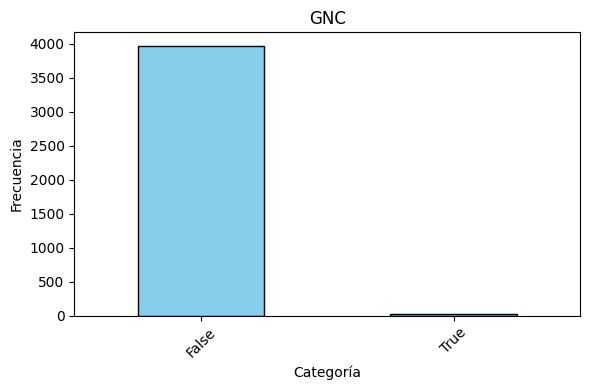

In [ ]:
# Lista de variables categóricas a incluir en los gráficos de barras
variables_categoricas = ['currency_id', 'ITEM_CONDITION', 'TRACTION_CONTROL', 'PASSENGER_CAPACITY',
                          'BRAND', 'DOORS', 'FUEL_TYPE', 'TRANSMISSION', 'GNC']

# Filtrar el DataFrame solo para las variables categóricas
df_categoricas = df[variables_categoricas]

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear gráficos de barras para cada variable categórica
for i, col in enumerate(df_categoricas.columns):
    plt.figure(figsize=(6, 4))  # Crear una nueva figura para cada variable categórica
    if col == 'BRAND':
        # Para la variable 'BRAND', mostrar solo las 10 más frecuentes
        df_categoricas[col].value_counts().nlargest(10).plot(kind='bar', color='skyblue', edgecolor='black')
    else:
        df_categoricas[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(col)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Análisis Bivariado

Se genera una matriz de correlación con el propósito de identificar las variables que presentan una mayor correlación con el precio del vehículo.

<ipython-input-20-55a6157db29b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


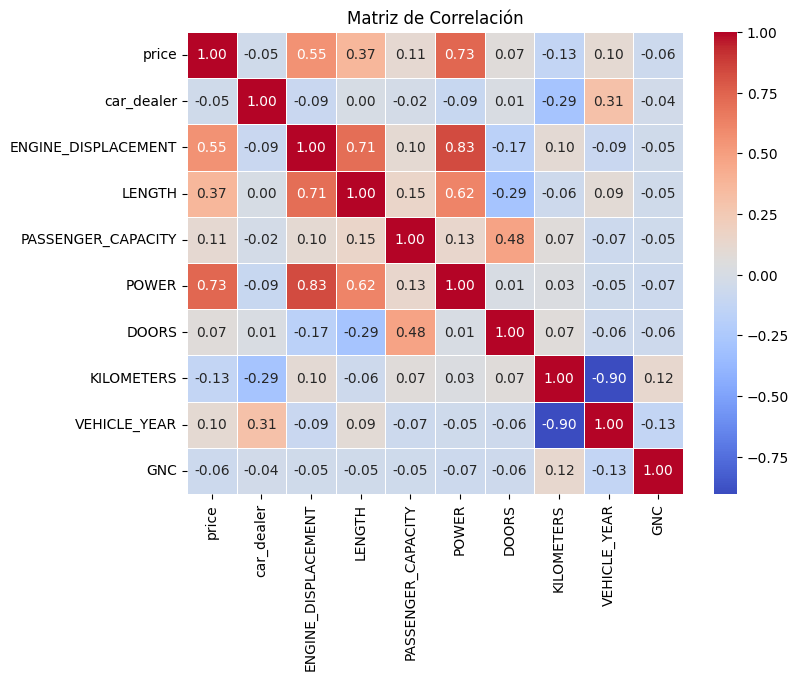

Correlaciones con 'price' (orden descendente):
POWER                  0.733780
ENGINE_DISPLACEMENT    0.554790
LENGTH                 0.372744
PASSENGER_CAPACITY     0.111941
VEHICLE_YEAR           0.104125
DOORS                  0.069956
car_dealer            -0.045662
GNC                   -0.064821
KILOMETERS            -0.128020
Name: price, dtype: float64


In [ ]:
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear la matriz de correlación usando seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar el título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

# Obtener una lista descendente de las correlaciones con "price"
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Filtrar para excluir la correlación con "price" consigo mismo
price_correlation = price_correlation[price_correlation.index != 'price']

# Mostrar la lista de correlaciones con "price"
print("Correlaciones con 'price' (orden descendente):")
print(price_correlation)

Con respecto al precio, se observa que las variables continuas que más correlacionan son POWER y ENGINE_DISPLACEMENT.

<Figure size 1500x1000 with 0 Axes>

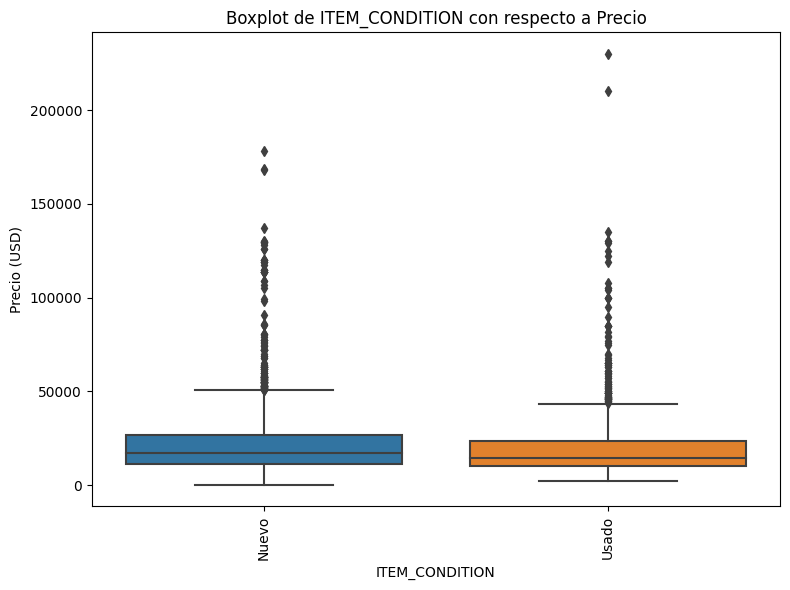

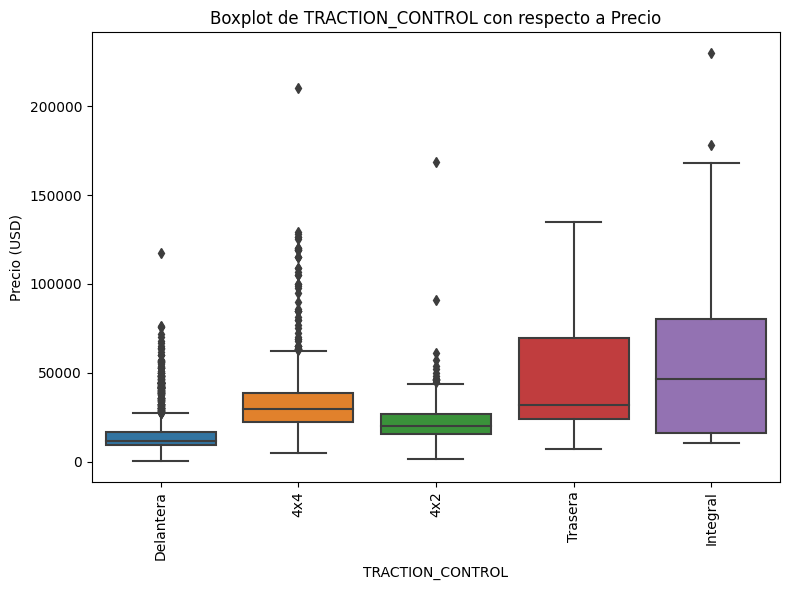

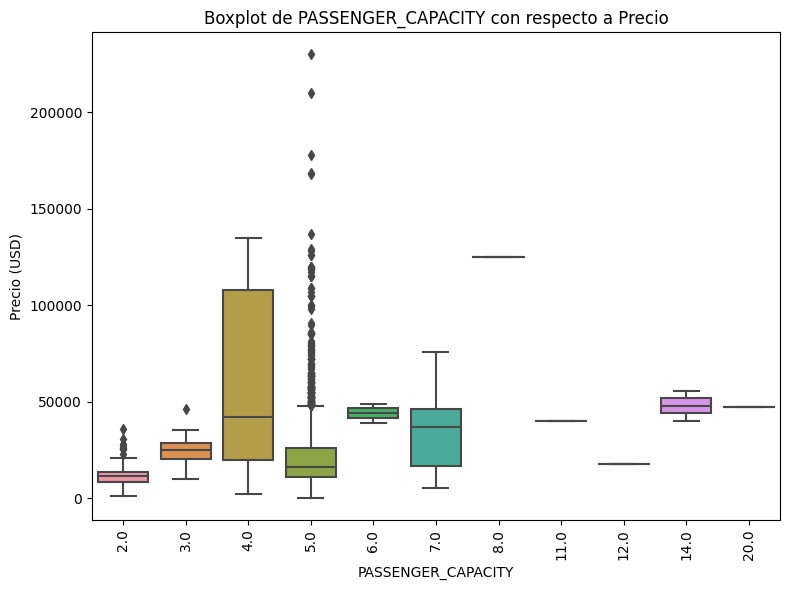

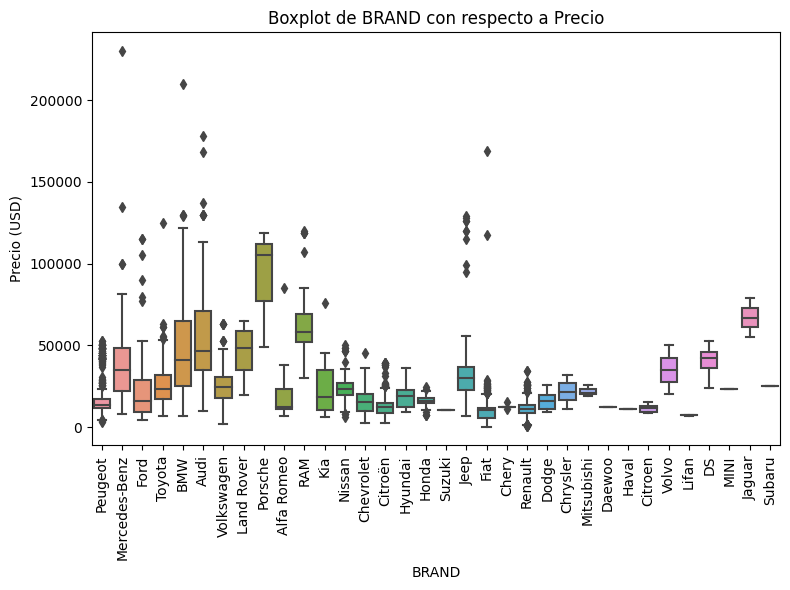

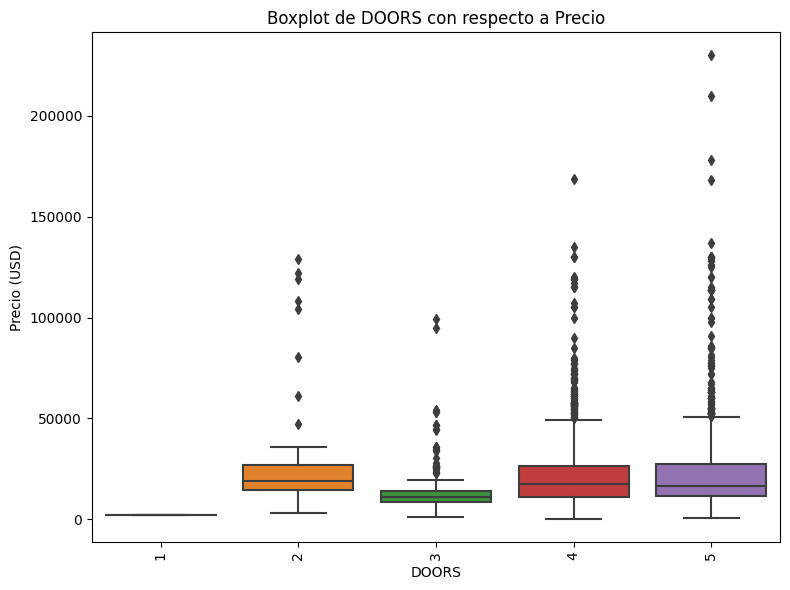

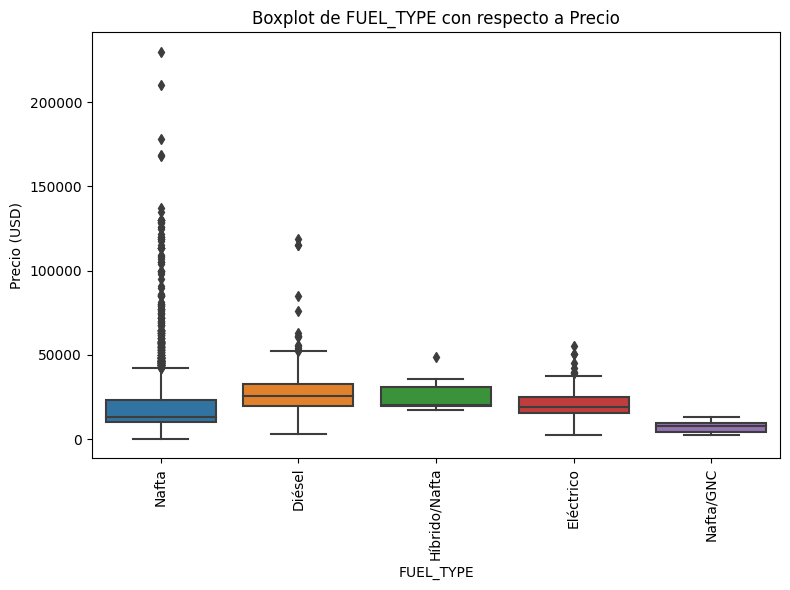

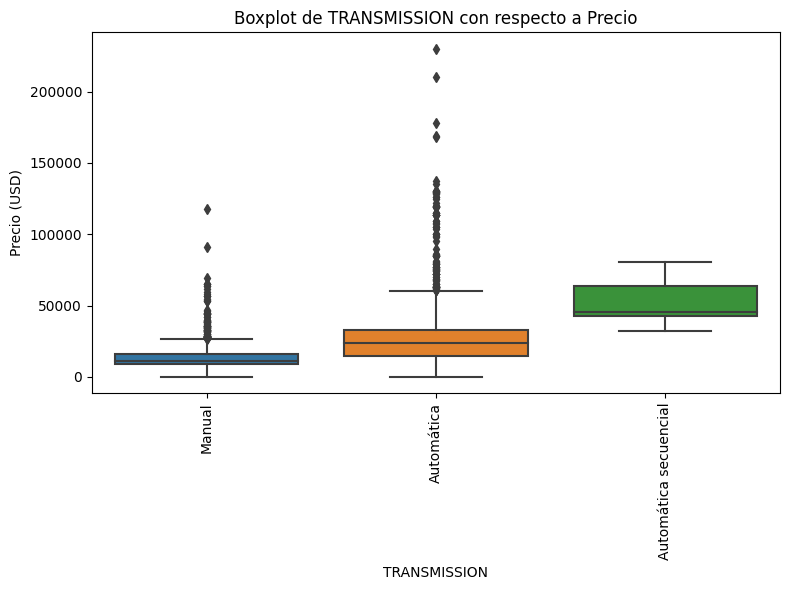

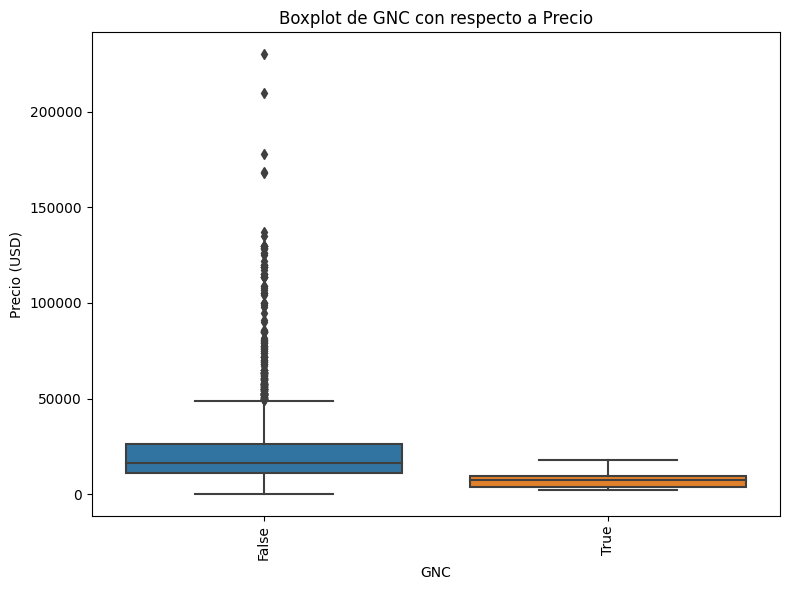

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Crear boxplots individuales para las variables categóricas con respecto a 'price'
categorical_variables = ['ITEM_CONDITION', 'TRACTION_CONTROL',
                          'PASSENGER_CAPACITY', 'BRAND', 'DOORS', 'FUEL_TYPE', 'TRANSMISSION', 'GNC']

for col in categorical_variables:
    plt.figure(figsize=(8, 6))  # Crear una nueva figura para cada variable categórica
    sns.boxplot(x=col, y='price', data=df2)
    plt.title(f'Boxplot de {col} con respecto a Precio')
    plt.xlabel(col)
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
